In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams.update({'font.size': 16})

# Analyzing Sounds
Two sounds were recorded. On of whistling into a microphone connected to an oscilloscope. The second sound is of someone saying "ahhh". The Fast Fourier Transform on the oscilloscope was used to find the frequency spectrum of each sound. The sounds are organized in an Excel file into two columns for time and amplitude and frequency and amplitude. Let's load it into a Pandas data frame or two.

In [21]:
time_dom = pd.read_excel('./Ah_Whistle.xlsx', sheet_name='time')
freq_dom = pd.read_excel('./Ah_Whistle.xlsx', sheet_name='freq')

# Plot the "normal" signal
Here is a plot of the whistle, which is a fairly pure tone (single frequency) sine wave.

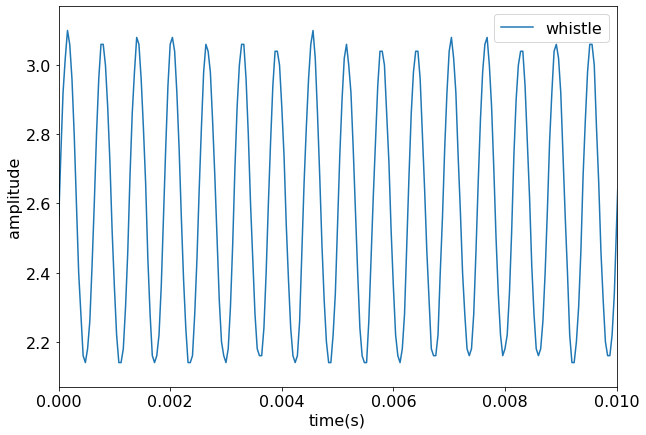

In [22]:
plt.plot(time_dom['Whistle_t'], time_dom['Whistle_tamp'], label='whistle')
plt.xlabel('time(s)')
plt.ylabel('amplitude')
plt.xlim(0, 0.01)
plt.legend()
plt.show()

## FFT
The FFT gives the amplitude as a function of frequencies in the signal. Since the whistle is a pure tone, we expect a single spike in the frequency spectrum at the frequency of the whistle. However, there is always a "zero frequency" background in the FFT. We will ignore it. I'm using a peak finding algorithm to get the frequency at the high amplitude frequencies.

1         4.93213
338    1667.06001
Name: Whistle_f, dtype: float64


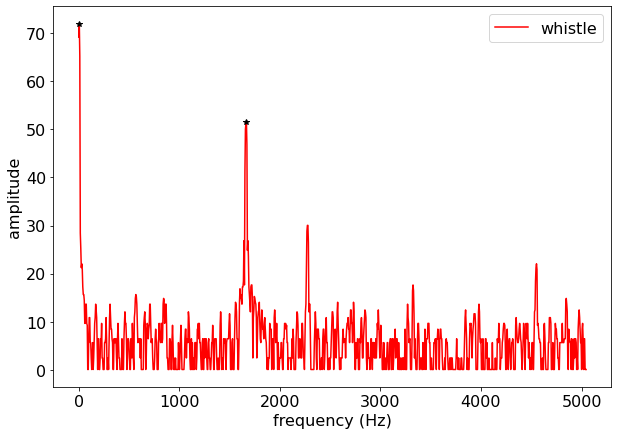

In [23]:
peaks, _ = find_peaks(freq_dom['Whistle_amp']+61, height=40)
print(freq_dom['Whistle_f'].iloc[peaks])

plt.plot(freq_dom['Whistle_f'], freq_dom['Whistle_amp']+61, '-r', label='whistle')
plt.plot(freq_dom['Whistle_f'].iloc[peaks], freq_dom['Whistle_amp'].iloc[peaks]+61, '*k')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
#plt.xlim(0, 0.01)
plt.legend()
plt.show()

## Open up and say "ah"
Here is the recording me saying "Ahhh". it has some regularity (repeating shape), but it is clearly not a single sine wave. In fact it is a sum of sine waves, where the sine waves with the highest amplitudes are the resonances in my esophagus. Let's see if we can determine the type of resonances (open-open or open-closed ends).

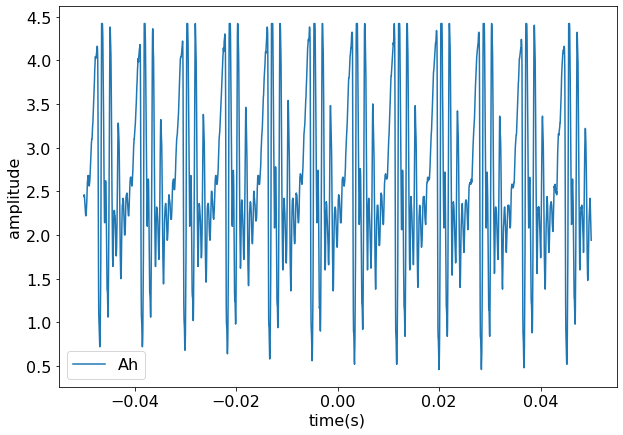

In [25]:
plt.plot(time_dom['Ah_t'], time_dom['Ah_tamp'], label='Ah')
plt.xlabel('time(s)')
plt.ylabel('amplitude')
#plt.xlim(0, 0.01)
plt.legend()
plt.show()

### FFT and peak find
We will do the same peak analysis on the Fourier Transform.

1         2.46607
45      110.97310
90      221.94625
135     332.91940
180     443.89255
223     549.93356
227     559.79784
272     670.77099
307     757.08344
311     766.94772
316     779.27807
355     875.45480
362     892.71729
502    1237.96709
921    2271.25042
925    2281.11470
929    2290.97898
Name: Ah_f, dtype: float64


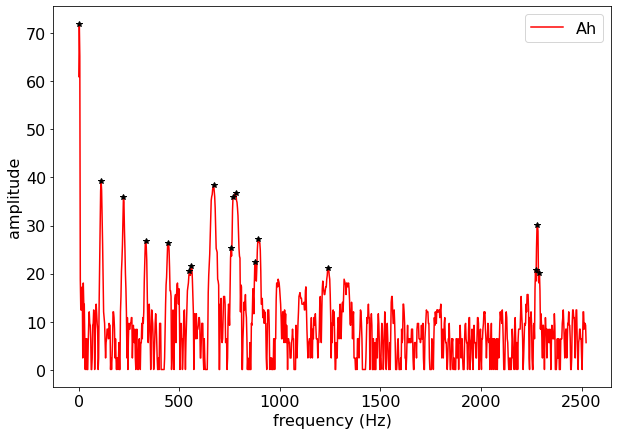

In [28]:
peaks, _ = find_peaks(freq_dom['Ah_amp']+61, height=20)
print(freq_dom['Ah_f'].iloc[peaks])

plt.plot(freq_dom['Ah_f'], freq_dom['Ah_amp']+61, '-r', label='Ah')
plt.plot(freq_dom['Ah_f'].iloc[peaks], freq_dom['Ah_amp'].iloc[peaks]+61, '*k')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
#plt.xlim(0, 0.01)
plt.legend()
plt.show()

# Conclusion
The frequencies are 111, 222, 333, 444, 550/560, 671, 766/779, 893 Hz. These are clearly scaling as

$f_o, 2f_o, 3f_o, 4f_o, \cdots$

This would imply that the throat is acting like two open ends.